<a href="https://colab.research.google.com/github/HARSHGit45/Deep-Learning-Neural-Networks/blob/main/EuRoSAT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from zipfile import ZipFile

data_path =  '/content/drive/MyDrive/eurosat.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [4]:
data_path = '/content/EuroSAT'

In [5]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train = datagen.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)





val = datagen.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [6]:
print(train.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,722 (4.87 MB)

 Trainable params: 1,275,722 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train, validation_data=val, epochs=20)


Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.3775 - loss: 1.5884 - val_accuracy: 0.6846 - val_loss: 0.8668
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.6771 - loss: 0.8953 - val_accuracy: 0.7141 - val_loss: 0.8083
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7339 - loss: 0.7469 - val_accuracy: 0.7776 - val_loss: 0.6086
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7657 - loss: 0.6545 - val_accuracy: 0.8069 - val_loss: 0.5341
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7960 - loss: 0.5726 - val_accuracy: 0.8093 - val_loss: 0.5432
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8167 - loss: 0.5266 - val_accuracy: 0.8354 - val_loss: 0.4796
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8385 - loss: 0.4643 - val_accuracy: 0.8391 - val_loss: 0.4507
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8581 - loss: 0.4041 - 

In [10]:
model.save('euroSat.h5')

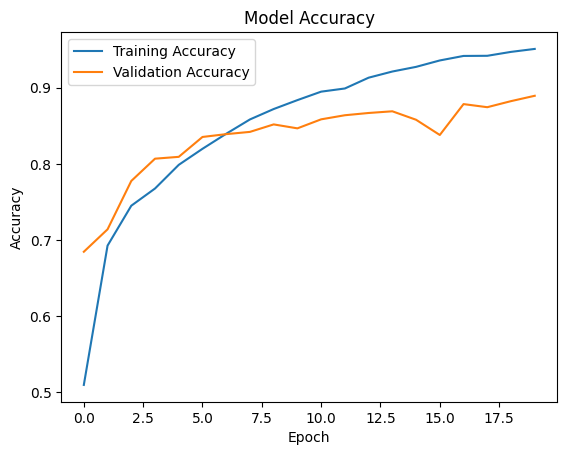

In [13]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

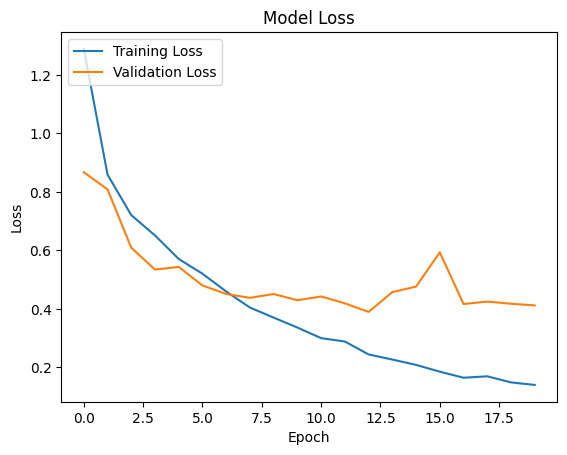

In [14]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')